In [1]:
#CSV Bibliothek importieren 
import csv
#Pandas importieren und als pd bezeichnen
import pandas as pd
#Numpy importieren und als np bezeichnen 
import numpy as np
#Json Biliothek importieren
import json
#Obere Schranke für die Größe der Daten auf 100,000,000 setzen  
csv.field_size_limit(100000000)
#Maximale Anzahl von Zeilen und Spalten Zeigen 
pd.options.display.max_columns = None
pd.options.display.max_rows = None
#Um die Zeiträume bearbeiten zu können
from datetime import datetime
#Seaborn für die Plot importieren
import seaborn as sns
#matplotlib Importieren und als plt bezeichnen
import matplotlib.pyplot as plt
#Macht die Plots inline
%matplotlib inline 
#dates importieren, um Zeitstempel bearbeiten zu können
import matplotlib.dates as mdates
#tick importieren
import matplotlib.ticker as tick
#Die Nachkommastellen auf 4 Zashlen einschränken
pd.options.display.float_format = '{:.4f}'.format

import matplotlib.ticker                         # here's where the formatter is
from matplotlib.ticker import ScalarFormatter
from matplotlib import ticker


***

# TweetsCov19
## KDE-Plot

***

In [2]:
#Die ausgewählten Tweets werden gelesen. 
pfad_tsv = 'C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_sample/Tweetscov19_sample/TweetsFormodel_final/tweetscov19_tweet_features_for_model.tsv'

df_tweetscov19 = pd.read_csv(pfad_tsv, sep='\t', error_bad_lines=False, names=['Tweet_Id', 'Username', 'Retweets', 'Favorites', 'Vader_neg', 'Vader_neu', 'Vader_pos', 'vader_compound', 'Hashtags_num', 'Mentions_num', 'Text_len', 'URLs_num', 'readability', 'Emoji_num', 'Emoji_sent', 'tweet_political_polarisation', 'tweet_science_polarisation', 'tweet_moderacy_polarisation', 'social', 'family', 'friend', 'female', 'male' , 'work', 'leisure', 'home', 'money', 'relegion', 'death', 'informal', 'swear', 'netspeak', 'assent', 'nonflu', 'filler', 'body', 'health', 'sexual', 'ingest', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'insight', 'cause', 'discrep', 'tentat', 'certain', 'differ', 'affiliation', 'achiev', 'power', 'reward', 'risk', 'focuspast', 'focuspresent', 'focusfuture', 'i', 'we', 'you', 'shehe', 'they', 'ipron', 'article', 'prep', 'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj', 'compare', 'interrog', 'number', 'quant', 'see', 'hear', 'feel', 'motion', 'space', 'time', 'user_political_polarisation', 'user_science_polarisation', 'user_moderacy_polarisation', 'user_posted_tweets', 'user_deleted_tweets', 'user_Deletion_ratio', 'user_Reputation', 'is_deleted', 'user_vadercompound_average', 'tweet_vadercompound_difference', 'tweet_political_polarisation_difference', 'tweet_science_polarisation_difference', 'tweet_moderacy_polarisation_difference' ])

print('Shape :', df_tweetscov19.shape)
df_tweetscov19.head()

Shape : (9409841, 95)


,Tweet_Id,Username,Retweets,Favorites,Vader_neg,Vader_neu,Vader_pos,vader_compound,Hashtags_num,Mentions_num,Text_len,URLs_num,readability,Emoji_num,Emoji_sent,tweet_political_polarisation,tweet_science_polarisation,tweet_moderacy_polarisation,social,family,friend,female,male,work,leisure,home,money,relegion,death,informal,swear,netspeak,assent,nonflu,filler,body,health,sexual,ingest,posemo,negemo,anx,anger,sad,insight,cause,discrep,tentat,certain,differ,affiliation,achiev,power,reward,risk,focuspast,focuspresent,focusfuture,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,see,hear,feel,motion,space,time,user_political_polarisation,user_science_polarisation,user_moderacy_polarisation,user_posted_tweets,user_deleted_tweets,user_Deletion_ratio,user_Reputation,is_deleted,user_vadercompound_average,tweet_vadercompound_difference,tweet_political_polarisation_difference,tweet_science_polarisation_difference,tweet_moderacy_polarisation_difference
0,1255980348229529601,fa5fd446e778da0acba3504aeab23da5,0,0,-0.0000,1.0000,0.0000,0.0000,3,0,3,0,121.2200,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,9,8,0.8889,0.5224,False,0.5923,0.0000,0.0000,0.0000,0.0000
1,1255981220640546816,547501e9cc84b8148ae1b8bde04157a4,4,6,-0.0000,0.7280,0.2720,0.4576,0,0,62,0,37.9000,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,10.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,10.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,20.0000,0.0000,0.0000,0.0000,0.0000,0.0000,10.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1,0,0.0000,0.3847,False,0.4576,0.0000,0.0000,0.0000,0.0000
2,1255981244560683008,840ac60dab55f6b212dc02dcbe5dfbd6,1,2,-0.2210,0.5890,0.1900,-0.1717,0,0,108,1,78.7720,0,0.0000,-1.0000,0.0000,-1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.2600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.2600,5.2600,5.2600,5.2600,0.0000,5.2600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,10.5300,5.2600,5.2600,5.2600,0.0000,0.0000,0.0000,10.5300,5.2600,5.2600,0.0000,5.2600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.2600,-1.0000,0.0000,-1.0000,1,0,0.0000,0.6079,False,-0.1717,0.0000,0.0000,0.0000,0.0000
3,1255981472285986816,37c68a001198b5efd4a21e2b68a0c9bc,0,0,-0.0000,1.0000,0.0000,0.0000,0,0,165,1,55.3890,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.7000,0.0000,0.0000,0.0000,0.0000,7.4100,0.0000,3.7000,0.0000,0.0000,0.0000,0.0000,3.7000,0.0000,3.7000,0.0000,11.1100,14.8100,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.7000,3.7000,7.4100,11.1100,0.0000,3.7000,0.0000,25.9300,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7.4100,0.0000,0.0000,0.0000,7,0,0.0000,0.5691,False,0.1702,0.0000,0.0000,0.0000,0.0000
4,1255981581354905600,8c3620bdfb9d2a1acfdf2412c9b34e06,0,0,-0.2110,0.6290,0.1600,-0.2263,0,0,66,0,83.0090,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7.1400,0.0000,7.1400,0.0000,0.0000,0.0000,7.1400,0.0000,0.0000,7.1400,0.0000,7.1400,0.0000,7.1400,0.0000,0.

In [3]:
path = 'C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_sample/TweetsCov19_sample/TweetsCov19_sample_original.tsv'

df_tweetscov19_timestamp = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Tweet_Id', 'Username', 'Timestamp', 'Followers', 'Friends', 'Retweets', 'Favorites', 'Entities', 'Sentiment', 'Mentions', 'Hashtags', 'URLs', 'text', 'is_deleted', 'Mentions_num', 'Hashtags_num', 'Urls_num', 'Domains', 'Text_len', 'readability', 'Vader_neg', 'Vader_neu', 'Vader_pos', 'Vader_compound', 'Emojies', 'Emoji_num', 'Emoji_neg', 'Emoji_neu', 'Emoji_pos', 'Emoji_sentiment', 'Emoji_bearbeiteten'])

print('Shape :', df_tweetscov19_timestamp.shape)
df_tweetscov19_timestamp.head()

Shape : (9409841, 31)


,Tweet_Id,Username,Timestamp,Followers,Friends,Retweets,Favorites,Entities,Sentiment,Mentions,Hashtags,URLs,text,is_deleted,Mentions_num,Hashtags_num,Urls_num,Domains,Text_len,readability,Vader_neg,Vader_neu,Vader_pos,Vader_compound,Emojies,Emoji_num,Emoji_neg,Emoji_neu,Emoji_pos,Emoji_sentiment,Emoji_bearbeiteten
0,1255980348229529601,fa5fd446e778da0acba3504aeab23da5,Thu Apr 30 22:00:24 +0000 2020,29697,24040,0,0,null;,1 -1,null;,Opinion Next2blowafrica thoughts,null;,NaN,False,0,3,0,0,3,121.2200,-0.0000,1.0000,0.0000,0.0000,[],0,-0.0000,0.0000,0.0000,0.0000,0.0000
1,1255981220640546816,547501e9cc84b8148ae1b8bde04157a4,Thu Apr 30 22:03:52 +0000 2020,799,1278,4,6,null;,1 -1,null;,null;,null;,Really wish the Buckley Club hadn't unleashed ...,False,0,0,0,0,62,37.9000,-0.0000,0.7280,0.2720,0.4576,[],0,-0.0000,0.0000,0.0000,0.0000,0.0000
2,1255981244560683008,840ac60dab55f6b212dc02dcbe5dfbd6,Thu Apr 30 22:03:58 +0000 2020,586,378,1,2,null;,2 -1,null;,null;,https://www.bbc.com/news/uk-england-beds-bucks...,Captain Tom Moore's is truely one of the best ...,False,0,0,1,bbc.com,108,78.7720,-0.2210,0.5890,0.1900,-0.1717,[],0,-0.0000,0.0000,0.0000,0.0000,0.0000
3,1255981472285986816,37c68a001198b5efd4a21e2b68a0c9bc,Thu Apr 30 22:04:52 +0000 2020,237,168,0,0,null;,1 -1,null;,null;,https://lockdownsceptics.org/2020/04/30/latest...,Which won't happen: New Zealand’s draconian lo...,False,0,0,1,lockdownsceptics.org,165,55.3890,-0.0000,1.0000,0.0000,0.0000,[],0,-0.0000,0.0000,0.0000,0.0000,0.0000
4,1255981581354905600,8c3620bdfb9d2a1acfdf2412c9b34e06,Thu Apr 30 22:05:18 +0000 2020,423,427,0,0,i hate u:I_Hate_U:-1.8786140035817729;quaranti...,1 -4,null;,null;,null;,my skin is breaking out and I'm gaining weight...,True,0,0,0,0,66,83.0090,-0.2110,0.6290,0.1600,-0.2263,[],0,-0.0000,0.0000,0.0000,0.0000,0.0000


In [4]:
df_tweetscov19_timestamp = df_tweetscov19_timestamp[['Tweet_Id', 'Timestamp']]

In [15]:
df_tweetscov19 = df_tweetscov19[df_tweetscov19['tweet_vadercompound_difference'] < 0]
df_tweetscov19.shape

(2522839, 95)

In [5]:
df_tweetscov19 = df_tweetscov19[df_tweetscov19['user_political_polarisation'] != 0]

print('Shape: ', df_tweetscov19.shape)
df_tweetscov19.head()

Shape:  (1973156, 95)


,Tweet_Id,Username,Retweets,Favorites,Vader_neg,Vader_neu,Vader_pos,vader_compound,Hashtags_num,Mentions_num,Text_len,URLs_num,readability,Emoji_num,Emoji_sent,tweet_political_polarisation,tweet_science_polarisation,tweet_moderacy_polarisation,social,family,friend,female,male,work,leisure,home,money,relegion,death,informal,swear,netspeak,assent,nonflu,filler,body,health,sexual,ingest,posemo,negemo,anx,anger,sad,insight,cause,discrep,tentat,certain,differ,affiliation,achiev,power,reward,risk,focuspast,focuspresent,focusfuture,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,see,hear,feel,motion,space,time,user_political_polarisation,user_science_polarisation,user_moderacy_polarisation,user_posted_tweets,user_deleted_tweets,user_Deletion_ratio,user_Reputation,is_deleted,user_vadercompound_average,tweet_vadercompound_difference,tweet_political_polarisation_difference,tweet_science_polarisation_difference,tweet_moderacy_polarisation_difference
2,1255981244560683008,840ac60dab55f6b212dc02dcbe5dfbd6,1,2,-0.2210,0.5890,0.1900,-0.1717,0,0,108,1,78.7720,0,0.0000,-1.0000,0.0000,-1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.2600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.2600,5.2600,5.2600,5.2600,0.0000,5.2600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,10.5300,5.2600,5.2600,5.2600,0.0000,0.0000,0.0000,10.5300,5.2600,5.2600,0.0000,5.2600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.2600,-1.0000,0.0000,-1.0000,1,0,0.0000,0.6079,False,-0.1717,0.0000,0.0000,0.0000,0.0000
6,1255982852371554304,916dec763c84916c929bb257ff96187d,213,926,-0.2310,0.7690,0.0000,-0.5859,0,0,115,1,80.2000,0,0.0000,0.0000,0.0000,0.0000,4.5500,0.0000,0.0000,0.0000,0.0000,4.5500,0.0000,0.0000,4.5500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.5500,0.0000,4.5500,0.0000,0.0000,4.5500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,9.0900,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.5500,22.7300,0.0000,9.0900,4.5500,0.0000,13.6400,0.0000,0.0000,0.0000,0.0000,0.0000,4.5500,0.0000,0.0000,0.0000,4.5500,0.0000,1.0000,0.0000,0.9344,170,0,0.0000,0.8524,False,-0.0776,-0.5083,-1.0000,0.0000,-0.9344
7,1255983890524786689,86e70e2bdc63363a4fecce1c9ba60e0f,5,6,-0.1870,0.8130,0.0000,-0.7841,0,0,242,1,83.2430,0,0.0000,-1.0000,0.0000,-1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.5600,0.0000,2.5600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.1300,0.0000,0.0000,0.0000,2.5600,2.5600,0.0000,0.0000,2.5600,0.0000,0.0000,2.5600,2.5600,5.1300,0.0000,0.0000,0.0000,0.0000,0.0000,2.5600,10.2600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.5600,2.5600,2.5600,7.6900,5.1300,2.5600,0.0000,12.8200,10.2600,5.1300,0.0000,0.0000,2.5600,0.0000,2.5600,0.0000,2.5600,2.5600,2.5600,-1.0000,0.0000,-0.3333,12,0,0.0000,0.5170,False,-0.4073,-0.3768,0.0000,0.0000,-0.6667
9,1255985687062601729,2af96845573e5256307de4504c9051fc,1,3,-0.2060,0.6880,0.1060,-0.7886,1,1,272,0,66.4010,0,0.0000,0.0000,0.0000,0.0000,8.5100,0.0000,0.0000,0.0000,0.0000,4.2600,0.0000,0.0000,0.0000,2.1300,0.0000,4.2600,2.1300,2.1300,0.0000,0.0000,0.0000,0.0000,2.1300,0.0000,0.0000,4.2600,6.3800,0.0000,4.2600,0.0000,0.0000,4.2600,0.0000,0.0000,4.2600,0.0000,0.0000,2.1300,8.5100,2.1300,0.0000,8.5100,2.1300,0.0000,0.0000,0.0000,0.0000,0.0000,2.1300,4.2600,4.2600,12.7700,4.2600,2.1300,2.1300,0.0000,8.5100,6.3800,0.0000,0.0000,0.0000,0.0000,0.0000,2.1300,0.0000,0.0000,8.5100,6.3800,0.3333,-1.0000,-0.3333,23,0,0.0000,0.0812,False,-0.3202,-0.4684,-0.3333,1.0000,0.3333
10,1255985760790069251,c8f0b58eb5105e2318e15ff17b9e4250,4,33,-0.0000,1.0000,0.0000,0.0000,0,2,70,0,52.8650,0,0.0000,0.0000,0.0000,0.0000,10.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0

In [5]:
df_tweetscov19_del = df_tweetscov19[df_tweetscov19['is_deleted']==True]
df_tweetscov19_undel = df_tweetscov19[df_tweetscov19['is_deleted']==False]

In [6]:
print('Alle Users:', df_tweetscov19.Username.unique().size)

df = df_tweetscov19[df_tweetscov19['user_political_polarisation']>0]
print('Alle kon. Users in gesammten Tweets:', df.Username.unique().size)

df = df_tweetscov19[df_tweetscov19['user_political_polarisation']<0]
print('Alle lib. Users in gesammten Tweets:', df.Username.unique().size)

Alle Users: 103272
Alle kon. Users in gesammten Tweets: 22754
Alle lib. Users in gesammten Tweets: 80518


In [7]:
print('Alle Users:', df_tweetscov19_del.Username.unique().size)

df = df_tweetscov19_del[df_tweetscov19_del['user_political_polarisation']>0]
print('Alle kon. Users in gelöschten Tweets:', df.Username.unique().size)

df = df_tweetscov19_del[df_tweetscov19_del['user_political_polarisation']<0]
print('Alle lib. Users in gelöschten Tweets:', df.Username.unique().size)

Alle Users: 22814
Alle kon. Users in gelöschten Tweets: 7180
Alle lib. Users in gelöschten Tweets: 15634


In [8]:
print('Alle Users:', df_tweetscov19_undel.Username.unique().size)

df = df_tweetscov19_undel[df_tweetscov19_undel['user_political_polarisation']>0]
print('Alle kon. Users in nicht gelöschten Tweets:', df.Username.unique().size)

df = df_tweetscov19_undel[df_tweetscov19_undel['user_political_polarisation']<0]
print('Alle lib. Users in nicht gelöschten Tweets:', df.Username.unique().size)

Alle Users: 86840
Alle kon. Users in nicht gelöschten Tweets: 16809
Alle lib. Users in nicht gelöschten Tweets: 70031


In [9]:
def plot_kdeplot_v1(df, hue, x, x_label, titel, name): 
    ax = sns.kdeplot(data=df, x=x, hue=hue, fill=True, legend= False)
    #ax = sns.kdeplot(data=df, x=x, hue=hue, multiple="fill")
    
    
    ax.set_ylabel(ylabel='Density', fontsize=15)
    ax.set_xlabel(xlabel=x_label, fontsize=17)

    ax.tick_params(axis='x', which='major', labelsize=16)
    ax.tick_params(axis='y', which='major', labelsize=15)

    plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(0.2, 1.13), ncol=2, loc=2, borderaxespad=0, fontsize=12)
    #g.set_title(titel, fontweight="bold")
    #plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(1.02, 1.), loc=2, borderaxespad=0)
    plt.tight_layout()
    #plt.savefig('../plots/'+name+'.pdf')


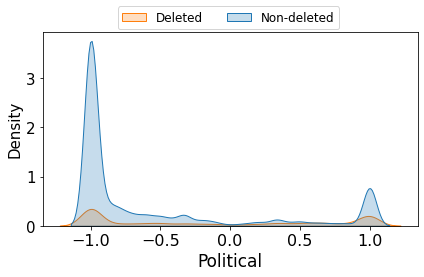

In [11]:
df = df_tweetscov19[['is_deleted', 'user_political_polarisation']]
plot_kdeplot_v1(df, 'is_deleted','user_political_polarisation' ,'Political' ,'TweetsCov19', 'kdeplot_tweetscov19_politic_all_tweets_conditionaldistribution')

In [5]:
df_tweetscov19_del = df_tweetscov19[df_tweetscov19['is_deleted']==True]
df_tweetscov19_undel = df_tweetscov19[df_tweetscov19['is_deleted']==False]

df_tweetscov19 = df_tweetscov19[df_tweetscov19['tweet_political_polarisation'] != 0]

print('Shape: ', df_tweetscov19.shape)
df_tweetscov19.head()

Shape:  (246183, 95)


,Tweet_Id,Username,Retweets,Favorites,Vader_neg,Vader_neu,Vader_pos,vader_compound,Hashtags_num,Mentions_num,Text_len,URLs_num,readability,Emoji_num,Emoji_sent,tweet_political_polarisation,tweet_science_polarisation,tweet_moderacy_polarisation,social,family,friend,female,male,work,leisure,home,money,relegion,death,informal,swear,netspeak,assent,nonflu,filler,body,health,sexual,ingest,posemo,negemo,anx,anger,sad,insight,cause,discrep,tentat,certain,differ,affiliation,achiev,power,reward,risk,focuspast,focuspresent,focusfuture,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,see,hear,feel,motion,space,time,user_political_polarisation,user_science_polarisation,user_moderacy_polarisation,user_posted_tweets,user_deleted_tweets,user_Deletion_ratio,user_Reputation,is_deleted,user_vadercompound_average,tweet_vadercompound_difference,tweet_political_polarisation_difference,tweet_science_polarisation_difference,tweet_moderacy_polarisation_difference
7,1255983890524786689,86e70e2bdc63363a4fecce1c9ba60e0f,5,6,-0.1870,0.8130,0.0000,-0.7841,0,0,242,1,83.2430,0,0.0000,-1.0000,0.0000,-1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.5600,0.0000,2.5600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.1300,0.0000,0.0000,0.0000,2.5600,2.5600,0.0000,0.0000,2.5600,0.0000,0.0000,2.5600,2.5600,5.1300,0.0000,0.0000,0.0000,0.0000,0.0000,2.5600,10.2600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.5600,2.5600,2.5600,7.6900,5.1300,2.5600,0.0000,12.8200,10.2600,5.1300,0.0000,0.0000,2.5600,0.0000,2.5600,0.0000,2.5600,2.5600,2.5600,-1.0000,0.0000,-0.3333,12,0,0.0000,0.5170,False,-0.4073,-0.3768,0.0000,0.0000,-0.6667
43,1256016698727002113,81452e50336836245a336dfe5142ca59,7,7,-0.1670,0.8330,0.0000,-0.4588,0,0,125,1,26.6830,0,0.0000,-1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.2600,5.2600,5.2600,0.0000,0.0000,5.2600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.2600,5.2600,5.2600,0.0000,5.2600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.2600,5.2600,10.5300,5.2600,0.0000,5.2600,0.0000,15.7900,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.2600,0.0000,-1.0000,0.0000,0.9810,196,0,0.0000,0.9058,False,-0.1856,-0.2732,0.0000,0.0000,0.0190
67,1256033099353329664,f8f2524758b95111af89a0abda7ea233,2,3,-0.0850,0.9150,0.0000,-0.3818,2,0,198,1,55.8900,0,0.0000,1.0000,0.0000,1.0000,9.0900,0.0000,0.0000,0.0000,0.0000,3.0300,0.0000,3.0300,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.0300,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.0300,0.0000,0.0000,0.0000,6.0600,0.0000,3.0300,0.0000,0.0000,0.0000,6.0600,0.0000,0.0000,3.0300,0.0000,0.0000,3.0300,0.0000,6.0600,12.1200,3.0300,3.0300,6.0600,0.0000,9.0900,3.0300,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,9.0900,3.0300,0.1111,0.0000,0.1111,26,2,0.0769,0.8942,False,0.3366,-0.7184,0.8889,0.0000,0.8889
112,1256071701055619072,598f0c26e079c36eb0640f0dc524b58e,16,28,-0.1800,0.8200,0.0000,-0.5106,0,1,142,1,26.6830,0,0.0000,-1.0000,0.0000,-1.0000,8.3300,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.1700,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.1700,4.1700,0.0000,0.0000,0.0000,8.3300,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.1700,8.3300,4.1700,0.0000,0.0000,0.0000,8.3300,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-1.0000,0.0000,-1.0000,64,0,0.0000,0.9640,False,0.0391,-0.5497,0.0000,0.0000,0.0000
123,1256075848211263488,95483b3fafc33044c6f4f65acffdc957,225,598,-0.1730,0.8270,0.0000,-0.6597,0,0,164,1,36.9970,0,0.0000,-1.0000,0.0000,-1.0000,15.3800,0.0000,0.0000,0.0000,0.0000,3.8500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0

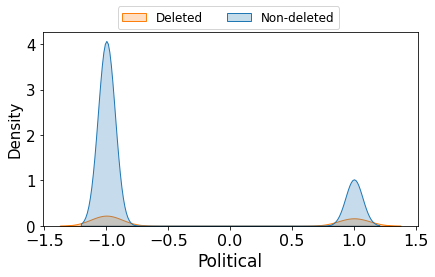

In [8]:
df = df_tweetscov19[['is_deleted', 'tweet_political_polarisation']]
plot_kdeplot_v1(df, 'is_deleted','tweet_political_polarisation' ,'Political' ,'TweetsCov19', 'kdeplot_tweetscov19_politic_all_tweets_conditionaldistribution')

In [9]:
from pylab import *

def plot_hexbin_reputaion(df, hue,x ,x_label, color, titel):
    
    ax = df.plot.hexbin(x=x, y="tweet_political_polarisation",cmap=color, gridsize=20, sharex=False)
    ax.set_ylabel(ylabel='tweet_political_polarisation', fontsize=17)
    ax.set_xlabel(xlabel=x_label, fontsize=17)

    ax.tick_params(axis='x', which='major', labelsize=16)
    ax.tick_params(axis='y', which='major', labelsize=16)
    
    
  
    
    f = plt.gcf()
    cax = f.get_axes()[1]
    #cax.set_ylabel('test')
    formatter = ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    #formatter.set_useOffset(1000)
    
    cax.tick_params(labelsize=16)
    #cax.ticklabel_format(style='scientific', useMathText=True)
    
    cax.xaxis.set_major_formatter(formatter)
    cax.yaxis.set_major_formatter(formatter)
    
    fig = ax.get_figure()
    fig.tight_layout()

    #fig.savefig('../plots/'+titel+'.pdf')
    plt.show()

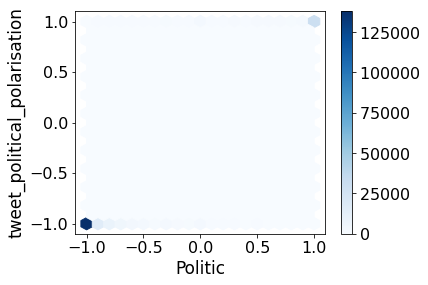

In [10]:
df = df_tweetscov19[['is_deleted', 'user_political_polarisation', 'tweet_political_polarisation']]

df_del =  df[df['is_deleted']==True]
df_undel = df[df['is_deleted']==False]

plot_hexbin_reputaion(df, 'is_deleted','user_political_polarisation', 'Politic', 'Blues', 'Hexabinplot_tweetscov19_political_reputation(alltweets)')

In [13]:
def plot_kdeplot_v2(df, hue, x, x_label, titel, name): 
    ax = sns.kdeplot(data=df, x=x, hue=hue, multiple="fill")
    
    
    ax.set_ylabel(ylabel='Density', fontsize=15)
    ax.set_xlabel(xlabel=x_label, fontsize=17)

    ax.tick_params(axis='x', which='major', labelsize=16)
    ax.tick_params(axis='y', which='major', labelsize=15)

    plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(0.2, 1.13), ncol=2, loc=2, borderaxespad=0, fontsize=12)
    #g.set_title(titel, fontweight="bold")
    #plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(1.02, 1.), loc=2, borderaxespad=0)
    plt.tight_layout()
    #plt.savefig('../plots/'+name+'.pdf')


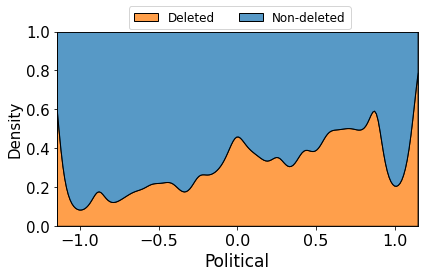

In [14]:
df = df_tweetscov19[['is_deleted', 'user_political_polarisation']]
plot_kdeplot_v2(df, 'is_deleted','user_political_polarisation' ,'user_political_polarisation' ,'TweetsCov19', 'kdeplot_tweetscov19_politic_all_tweets_Normalizethestackeddistribution')

In [15]:
def plot_kdeplot_v3(df, hue, x, x_label, titel, name): 
    #ax = sns.kdeplot(data=df, x=x, hue=hue, multiple="fill")
    ax = sns.kdeplot(
    data=df, x=x, hue=hue,
    cumulative=True, common_norm=False, common_grid=True,
    )
    
    ax.set_ylabel(ylabel='Density', fontsize=15)
    ax.set_xlabel(xlabel=x_label, fontsize=17)

    ax.tick_params(axis='x', which='major', labelsize=16)
    ax.tick_params(axis='y', which='major', labelsize=15)

    plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(0.2, 1.13), ncol=2, loc=2, borderaxespad=0, fontsize=12)
    #g.set_title(titel, fontweight="bold")
    #plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(1.02, 1.), loc=2, borderaxespad=0)
    plt.tight_layout()
    #plt.savefig('../plots/'+name+'.pdf')


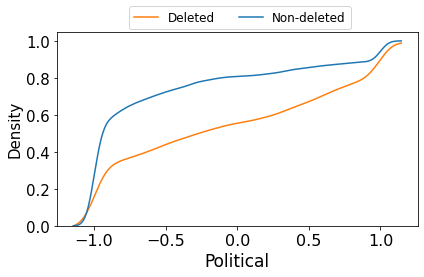

In [16]:
df = df_tweetscov19[['is_deleted', 'user_political_polarisation']]
plot_kdeplot_v3(df, 'is_deleted','user_political_polarisation' ,'Political' ,'TweetsCov19', 'kdeplot_tweetscov19_politic_all_tweets_cumulativedistributionfunction')

In [6]:
df_tweetscov19 = pd.merge(df_tweetscov19, df_tweetscov19_timestamp, on='Tweet_Id', how='inner')

print('Shape :', df_tweetscov19.shape)
df_tweetscov19.head()

Shape : (1973156, 96)


,Tweet_Id,Username,Retweets,Favorites,Vader_neg,Vader_neu,Vader_pos,vader_compound,Hashtags_num,Mentions_num,Text_len,URLs_num,readability,Emoji_num,Emoji_sent,tweet_political_polarisation,tweet_science_polarisation,tweet_moderacy_polarisation,social,family,friend,female,male,work,leisure,home,money,relegion,death,informal,swear,netspeak,assent,nonflu,filler,body,health,sexual,ingest,posemo,negemo,anx,anger,sad,insight,cause,discrep,tentat,certain,differ,affiliation,achiev,power,reward,risk,focuspast,focuspresent,focusfuture,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,see,hear,feel,motion,space,time,user_political_polarisation,user_science_polarisation,user_moderacy_polarisation,user_posted_tweets,user_deleted_tweets,user_Deletion_ratio,user_Reputation,is_deleted,user_vadercompound_average,tweet_vadercompound_difference,tweet_political_polarisation_difference,tweet_science_polarisation_difference,tweet_moderacy_polarisation_difference,Timestamp
0,1255981244560683008,840ac60dab55f6b212dc02dcbe5dfbd6,1,2,-0.2210,0.5890,0.1900,-0.1717,0,0,108,1,78.7720,0,0.0000,-1.0000,0.0000,-1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.2600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.2600,5.2600,5.2600,5.2600,0.0000,5.2600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,10.5300,5.2600,5.2600,5.2600,0.0000,0.0000,0.0000,10.5300,5.2600,5.2600,0.0000,5.2600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.2600,-1.0000,0.0000,-1.0000,1,0,0.0000,0.6079,False,-0.1717,0.0000,0.0000,0.0000,0.0000,Thu Apr 30 22:03:58 +0000 2020
1,1255982852371554304,916dec763c84916c929bb257ff96187d,213,926,-0.2310,0.7690,0.0000,-0.5859,0,0,115,1,80.2000,0,0.0000,0.0000,0.0000,0.0000,4.5500,0.0000,0.0000,0.0000,0.0000,4.5500,0.0000,0.0000,4.5500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.5500,0.0000,4.5500,0.0000,0.0000,4.5500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,9.0900,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.5500,22.7300,0.0000,9.0900,4.5500,0.0000,13.6400,0.0000,0.0000,0.0000,0.0000,0.0000,4.5500,0.0000,0.0000,0.0000,4.5500,0.0000,1.0000,0.0000,0.9344,170,0,0.0000,0.8524,False,-0.0776,-0.5083,-1.0000,0.0000,-0.9344,Thu Apr 30 22:10:21 +0000 2020
2,1255983890524786689,86e70e2bdc63363a4fecce1c9ba60e0f,5,6,-0.1870,0.8130,0.0000,-0.7841,0,0,242,1,83.2430,0,0.0000,-1.0000,0.0000,-1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.5600,0.0000,2.5600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.1300,0.0000,0.0000,0.0000,2.5600,2.5600,0.0000,0.0000,2.5600,0.0000,0.0000,2.5600,2.5600,5.1300,0.0000,0.0000,0.0000,0.0000,0.0000,2.5600,10.2600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.5600,2.5600,2.5600,7.6900,5.1300,2.5600,0.0000,12.8200,10.2600,5.1300,0.0000,0.0000,2.5600,0.0000,2.5600,0.0000,2.5600,2.5600,2.5600,-1.0000,0.0000,-0.3333,12,0,0.0000,0.5170,False,-0.4073,-0.3768,0.0000,0.0000,-0.6667,Thu Apr 30 22:14:29 +0000 2020
3,1255985687062601729,2af96845573e5256307de4504c9051fc,1,3,-0.2060,0.6880,0.1060,-0.7886,1,1,272,0,66.4010,0,0.0000,0.0000,0.0000,0.0000,8.5100,0.0000,0.0000,0.0000,0.0000,4.2600,0.0000,0.0000,0.0000,2.1300,0.0000,4.2600,2.1300,2.1300,0.0000,0.0000,0.0000,0.0000,2.1300,0.0000,0.0000,4.2600,6.3800,0.0000,4.2600,0.0000,0.0000,4.2600,0.0000,0.0000,4.2600,0.0000,0.0000,2.1300,8.5100,2.1300,0.0000,8.5100,2.1300,0.0000,0.0000,0.0000,0.0000,0.0000,2.1300,4.2600,4.2600,12.7700,4.2600,2.1300,2.1300,0.0000,8.5100,6.3800,0.0000,0.0000,0.0000,0.0000,0.0000,2.1300,0.0000,0.0000,8.5100,6.3800,0.3333,-1.0000,-0.3333,23,0,0.0000,0.0812,False,-0.3202,-0.4684,-0.3333,1.0000,0.3333,Thu Apr 30 22:21:37 +0000 2020
4,1255985760790069251,c8f0b58eb5105e2318e15ff17b9e4250,4,33,-0.0000,1.0000,0.0000,0.0000,0,2,70,0,52.8650,0,0.0000,0.0000,0.0000,0.0000,10.0000,0.0000,0.0000,0

In [7]:
df_tweetscov19_del = df_tweetscov19[df_tweetscov19['is_deleted']==True]
df_tweetscov19_undel = df_tweetscov19[df_tweetscov19['is_deleted']==False]

df_conservatives = df_tweetscov19[df_tweetscov19['user_political_polarisation'] > 0]
df_del_conservatives = df_tweetscov19_del[df_tweetscov19_del['user_political_polarisation'] > 0]
df_undel_conservatives = df_tweetscov19_undel[df_tweetscov19_undel['user_political_polarisation'] > 0]

df_liberals = df_tweetscov19[df_tweetscov19['user_political_polarisation'] < 0]
df_del_liberals = df_tweetscov19_del[df_tweetscov19_del['user_political_polarisation'] < 0]
df_undel_liberals = df_tweetscov19_undel[df_tweetscov19_undel['user_political_polarisation'] < 0]


In [18]:
#Die drei Wertungen für die Stimmung, also negativ, positiv und Mittelwert von den gelöschten Tweets mit den nicht gelöschten Tweets vergleichen. 
def Stimmung_analyse_negativ_positiv_Mittelwert(df_tweetscov19 , titel):
    
    df_tweetscov19_del = df_tweetscov19[df_tweetscov19['is_deleted']==True]
    df_tweetscov19_undel = df_tweetscov19[df_tweetscov19['is_deleted']==False]

    df_conservatives = df_tweetscov19[df_tweetscov19['user_political_polarisation'] > 0]
    df_del_conservatives = df_tweetscov19_del[df_tweetscov19_del['user_political_polarisation'] > 0]
    df_undel_conservatives = df_tweetscov19_undel[df_tweetscov19_undel['user_political_polarisation'] > 0]

    df_liberals = df_tweetscov19[df_tweetscov19['user_political_polarisation'] < 0]
    df_del_liberals = df_tweetscov19_del[df_tweetscov19_del['user_political_polarisation'] < 0]
    df_undel_liberals = df_tweetscov19_undel[df_tweetscov19_undel['user_political_polarisation'] < 0]

    df_conservatives.reset_index()
    df_del_conservatives.reset_index()
    df_undel_conservatives.reset_index()
    
    df_liberals.reset_index()
    df_del_liberals.reset_index()
    df_undel_liberals.reset_index()
    
    df_conservatives['vader_compound']= df_conservatives['vader_compound'].astype(float) 
    df_del_conservatives['vader_compound']= df_del_conservatives['vader_compound'].astype(float) 
    df_undel_conservatives['vader_compound']= df_undel_conservatives['vader_compound'].astype(float) 

    df_liberals['vader_compound']= df_liberals['vader_compound'].astype(float) 
    df_del_liberals['vader_compound']= df_del_liberals['vader_compound'].astype(float) 
    df_undel_liberals['vader_compound']= df_undel_liberals['vader_compound'].astype(float) 
    
    
    df_del_conservatives.Timestamp = pd.to_datetime(df_del_conservatives.Timestamp)
    df_del_conservatives.sort_values(by = ['Timestamp'], inplace=True, ascending = True)
    df_del_conservatives.index = df_del_conservatives.Timestamp
    print('Number of tweets: ', df_del_conservatives['Tweet_Id'].size)
    g = df_del_conservatives.groupby(pd.DatetimeIndex(df_del_conservatives['Timestamp']).normalize())
    df_del_conservatives  = g.mean()
    
    df_del_liberals.Timestamp = pd.to_datetime(df_del_liberals.Timestamp)
    df_del_liberals.sort_values(by = ['Timestamp'], inplace=True, ascending = True)
    df_del_liberals.index = df_del_liberals.Timestamp
    print('Number of tweets: ', df_del_liberals['Tweet_Id'].size)
    g = df_del_liberals.groupby(pd.DatetimeIndex(df_del_liberals['Timestamp']).normalize())
    df_del_liberals  = g.mean()
    
    df_undel_conservatives.Timestamp = pd.to_datetime(df_undel_conservatives.Timestamp)
    df_undel_conservatives.sort_values(by = ['Timestamp'], inplace=True, ascending = True)
    df_undel_conservatives.index = df_undel_conservatives.Timestamp
    print('Number of tweets: ', df_undel_conservatives['Tweet_Id'].size)
    g = df_undel_conservatives.groupby(pd.DatetimeIndex(df_undel_conservatives['Timestamp']).normalize())
    df_undel_conservatives  = g.mean()
    
    df_undel_liberals.Timestamp = pd.to_datetime(df_undel_liberals.Timestamp)
    df_undel_liberals.sort_values(by = ['Timestamp'], inplace=True, ascending = True)
    df_undel_liberals.index = df_undel_liberals.Timestamp
    print('Number of tweets: ', df_undel_liberals['Tweet_Id'].size)
    g = df_undel_liberals.groupby(pd.DatetimeIndex(df_undel_liberals['Timestamp']).normalize())
    df_undel_liberals  = g.mean()
    
    df_conservatives.Timestamp = pd.to_datetime(df_conservatives.Timestamp)
    df_conservatives.sort_values(by = ['Timestamp'], inplace=True, ascending = True)
    df_conservatives.index = df_conservatives.Timestamp
    print('Number of tweets: ', df_conservatives['Tweet_Id'].size)
    g = df_conservatives.groupby(pd.DatetimeIndex(df_conservatives['Timestamp']).normalize())
    df_conservatives  = g.mean()
    
    df_liberals.Timestamp = pd.to_datetime(df_liberals.Timestamp)
    df_liberals.sort_values(by = ['Timestamp'], inplace=True, ascending = True)
    df_liberals.index = df_liberals.Timestamp
    print('Number of tweets: ', df_liberals['Tweet_Id'].size)
    g = df_liberals.groupby(pd.DatetimeIndex(df_liberals['Timestamp']).normalize())
    df_liberals  = g.mean()
    

    
    df_conservatives.rename(columns = {'vader_compound' : 'Conservatives (all tweets)'}, inplace = True)
    df_del_conservatives.rename(columns = {'vader_compound' : 'Conservatives (deleted tweets)'}, inplace = True)
    df_undel_conservatives.rename(columns = {'vader_compound' : 'Conservatives (non-deleted tweets)'}, inplace = True)

    df_liberals.rename(columns = {'vader_compound' : 'Liberals (all tweets)'}, inplace = True)
    df_del_liberals.rename(columns = {'vader_compound' : 'Liberals (deleted tweets)'}, inplace = True)
    df_undel_liberals.rename(columns = {'vader_compound' : 'Liberals (non-deleted tweets)'}, inplace = True)

    
    ax = df_conservatives.plot(y=['Conservatives (all tweets)'], figsize=(15,6), color = 'mediumblue')
    df_del_conservatives.plot(y=['Conservatives (deleted tweets)'], color = 'crimson', ax = ax)
    df_undel_conservatives.plot(y=['Conservatives (non-deleted tweets)'], color = 'darkgreen', ax = ax)

    df_liberals.plot(y=['Liberals (all tweets)'],style = '--' , color = 'mediumblue', ax = ax)
    df_del_liberals.plot(y=['Liberals (deleted tweets)'],style = '--' , color = 'crimson', ax = ax)
    df_undel_liberals.plot(y=['Liberals (non-deleted tweets)'],style = '--' , color = 'darkgreen', ax = ax)
    
    
    ax.set_xlabel('', fontsize = 19)
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.tick_params(axis='both', which='major', labelsize=16)
    
    ax.set_ylim([-0.25, 0.25])
    ax.yaxis.set_major_formatter(tick.FormatStrFormatter('%.2f'))
    ax.set_ylabel('Sentiment', fontsize = 19)
    plt.gca().legend(loc='lower center', ncol = 2, fontsize=19, bbox_to_anchor=(0.5, -0.4))
    
  
    #plt.savefig('C:/Mo/tweetDB/tweetscov19/tweetscov19_tsv/data_aus_tsv/plot/tweetsCov19_sample/Stimmungsanalyse_tweetcov19_vader_3.pdf', bbox_inches = 'tight')
    plt.show()

Number of tweets:  148124
Number of tweets:  202277
Number of tweets:  316346
Number of tweets:  1306409
Number of tweets:  464470
Number of tweets:  1508686


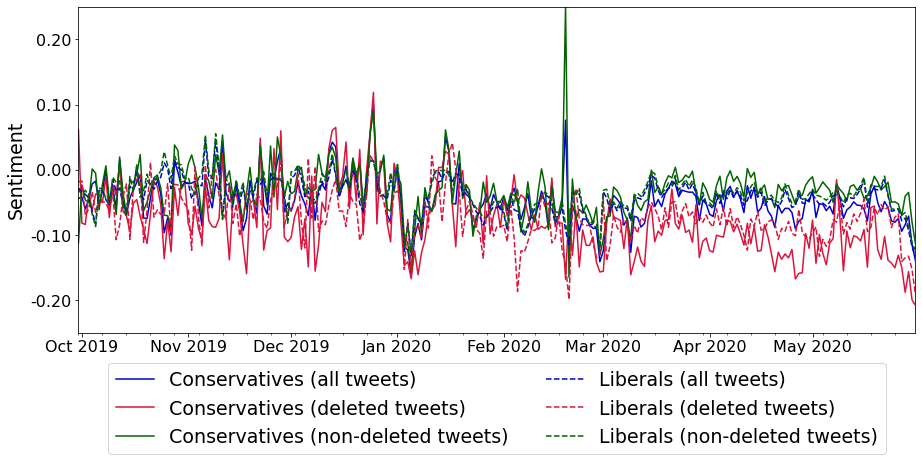

In [20]:
import warnings
warnings.filterwarnings('ignore')

Stimmung_analyse_negativ_positiv_Mittelwert(df_tweetscov19, 'Sentiment analysis')

***

# Histogram

***

In [17]:
def plot_histogram(df, titel):
    
    #figure(figsize=(8, 6), dpi=80)
    
    fig, ax = plt.subplots()
    colors = ['b', 'r']
    labels = ['Liberale', 'konservativ']
    
    N, bins, patches = ax.hist(df, bins=10, color = 'gray')
    for i in range(0,5):
        patches[i].set_facecolor('b')
    patches[1].set_label('Liberal')
    for i in range(5,len(patches)):
        patches[i].set_facecolor('r')
    patches[9].set_label('Conservative')
        
    ax.tick_params(axis='x', which='major', labelsize=14)
    ax.tick_params(axis='y', which='major', labelsize=13)

    figsize=(8, 6)
    plt.ylabel('Number of users', fontsize=16)
    ax.set_xlabel(xlabel='Politic', fontsize=17)

    #plt.title('Political polarization', fontsize=18)
    plt.legend( fontsize=12)
    plt.tight_layout()

    #plt.savefig('../plots/'+titel+'.pdf')

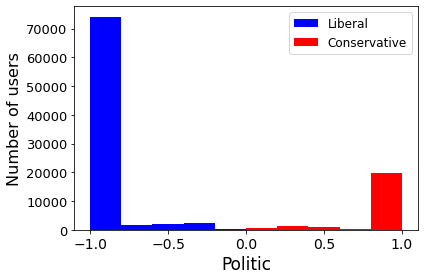

In [18]:
df = df_tweetscov19.drop_duplicates(subset=['Username'])
plot_histogram(df['user_political_polarisation'],'hist_tweetsCov19_political_polarized_users(alltweets)')

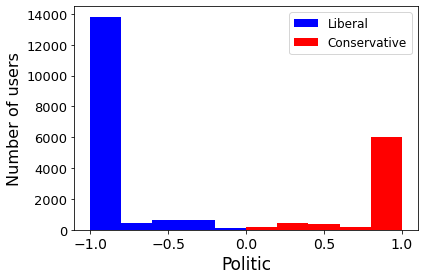

In [19]:
df = df_tweetscov19_del.drop_duplicates(subset=['Username'])
plot_histogram(df['user_political_polarisation'],'hist_tweetsCov19_political_polarized_users(deletedtweets)')

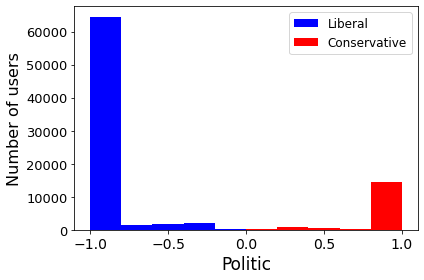

In [20]:
df = df_tweetscov19_undel.drop_duplicates(subset=['Username'])
plot_histogram(df['user_political_polarisation'],'hist_tweetsCov19_political_polarized_users(nondeletedtweets)')

***

# Hexabin
### Reputation-Polarisierung

In [26]:
from pylab import *

def plot_hexbin_reputaion(df, hue,x ,x_label, color, titel):
    
    ax = df.plot.hexbin(x=x, y="user_Reputation",cmap=color, gridsize=20, sharex=False)
    ax.set_ylabel(ylabel='Reputaion', fontsize=17)
    ax.set_xlabel(xlabel=x_label, fontsize=17)

    ax.tick_params(axis='x', which='major', labelsize=16)
    ax.tick_params(axis='y', which='major', labelsize=16)
    
    
  
    
    f = plt.gcf()
    cax = f.get_axes()[1]
    #cax.set_ylabel('test')
    formatter = ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    #formatter.set_useOffset(1000)
    
    cax.tick_params(labelsize=16)
    #cax.ticklabel_format(style='scientific', useMathText=True)
    
    cax.xaxis.set_major_formatter(formatter)
    cax.yaxis.set_major_formatter(formatter)
    
    fig = ax.get_figure()
    fig.tight_layout()

    #fig.savefig('../plots/'+titel+'.pdf')
    plt.show()

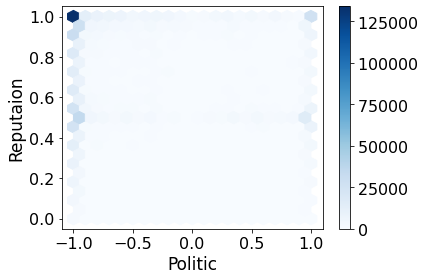

In [27]:
df = df_tweetscov19[['is_deleted', 'user_political_polarisation', 'user_Reputation']]

df_del =  df[df['is_deleted']==True]
df_undel = df[df['is_deleted']==False]

plot_hexbin_reputaion(df, 'is_deleted','user_political_polarisation', 'Politic', 'Blues', 'Hexabinplot_tweetscov19_political_reputation(alltweets)')

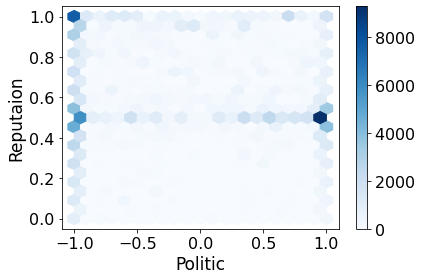

In [28]:
plot_hexbin_reputaion(df_del, 'is_deleted','user_political_polarisation', 'Politic', 'Blues', 'Hexabinplot_tweetscov19_political_reputation(deletedtweets)')

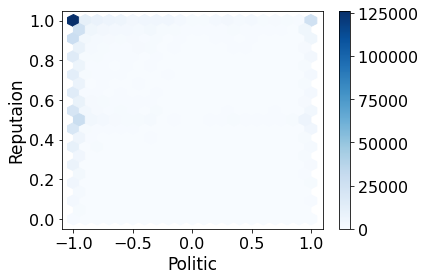

In [29]:
plot_hexbin_reputaion(df_undel, 'is_deleted','user_political_polarisation', 'Politic', 'Blues', 'Hexabinplot_tweetscov19_political_reputation(nondeletedtweets)')

***

***

***

# TweetKB
## KDE-Plot

***

In [15]:
path = '../data/tweetsKB_polarized_users_deletionratio_reputation.tsv'

df_tweetskb = pd.read_csv(path, sep='\t', error_bad_lines=False, names=["Username", 'politic', 'science', 'moderacy', 'Deletion_ratio', 'Reputation', 'is_deleted'])

print('Shape :', df_tweetskb.shape)
df_tweetskb.head()

Shape : (552665, 7)


,Username,politic,science,moderacy,Deletion_ratio,Reputation,is_deleted
0,0000Condor,-1.0000,0.0000,1.0000,1.0000,0.2556,True
1,007newsandviews,-1.0000,0.0000,-1.0000,0.0000,0.4828,False
2,007plus100,-1.0000,0.0000,-1.0000,0.0000,0.3980,False
3,007plus100,-1.0000,0.0000,-1.0000,0.0000,0.3980,False
4,007plus100,-1.0000,0.0000,-1.0000,0.0000,0.3980,False


In [16]:
df_tweetskb = df_tweetskb[df_tweetskb['politic'] != 0]

print('Shape: ', df_tweetskb.shape)
df_tweetskb.head()

Shape:  (478718, 7)


,Username,politic,science,moderacy,Deletion_ratio,Reputation,is_deleted
0,0000Condor,-1.0000,0.0000,1.0000,1.0000,0.2556,True
1,007newsandviews,-1.0000,0.0000,-1.0000,0.0000,0.4828,False
2,007plus100,-1.0000,0.0000,-1.0000,0.0000,0.3980,False
3,007plus100,-1.0000,0.0000,-1.0000,0.0000,0.3980,False
4,007plus100,-1.0000,0.0000,-1.0000,0.0000,0.3980,False


In [17]:
df_tweetskb_del = df_tweetskb[df_tweetskb['is_deleted']==True]
df_tweetskb_undel = df_tweetskb[df_tweetskb['is_deleted']==False]

In [18]:
print('Alle Users:', df_tweetskb.Username.unique().size)

df = df_tweetskb[df_tweetskb['politic']>0]
print('Alle kon. Users in gesammten Tweets:', df.Username.unique().size)

df = df_tweetskb[df_tweetskb['politic']<0]
print('Alle lib. Users in gesammten Tweets:', df.Username.unique().size)

Alle Users: 66027
Alle kon. Users in gesammten Tweets: 14967
Alle lib. Users in gesammten Tweets: 51060


In [19]:
print('Alle Users:', df_tweetskb_del.Username.unique().size)

df = df_tweetskb_del[df_tweetskb_del['politic']>0]
print('Alle kon. Users in gelöschten Tweets:', df.Username.unique().size)

df = df_tweetskb_del[df_tweetskb_del['politic']<0]
print('Alle lib. Users in gelöschten Tweets:', df.Username.unique().size)

Alle Users: 14796
Alle kon. Users in gelöschten Tweets: 4405
Alle lib. Users in gelöschten Tweets: 10391


In [20]:
print('Alle Users:', df_tweetskb_undel.Username.unique().size)

df = df_tweetskb_undel[df_tweetskb_undel['politic']>0]
print('Alle kon. Users in nicht gelöschten Tweets:', df.Username.unique().size)

df = df_tweetskb_undel[df_tweetskb_undel['politic']<0]
print('Alle lib. Users in nicht gelöschten Tweets:', df.Username.unique().size)

Alle Users: 55227
Alle kon. Users in nicht gelöschten Tweets: 11426
Alle lib. Users in nicht gelöschten Tweets: 43801


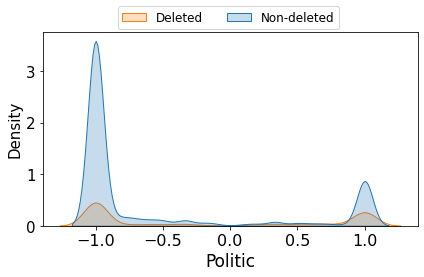

In [21]:
df = df_tweetskb[['is_deleted', 'politic']]
plot_kdeplot_v1(df, 'is_deleted','politic' ,'Politic' ,'TweetsCov19', 'kdeplot_tweetskb_politic_alltweets_conditionaldistribution')

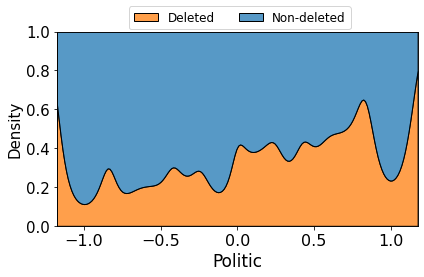

In [97]:
df = df_tweetskb[['is_deleted', 'politic']]
plot_kdeplot_v2(df, 'is_deleted','politic' ,'Politic' ,'TweetsCov19', 'kdeplot_tweetskb_politic_alltweets_Normalizethestackeddistribution')

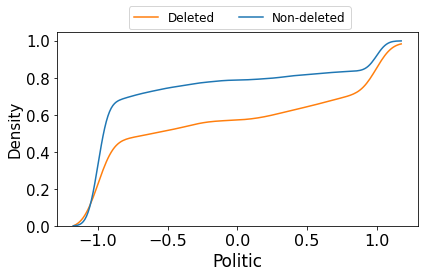

In [101]:
df = df_tweetskb[['is_deleted', 'politic']]
plot_kdeplot_v3(df, 'is_deleted','politic' ,'Politic' ,'TweetsCov19', 'kdeplot_tweetskb_politic_alltweets_cumulativedistributionfunction')

# Histogram

***

In [102]:
def plot_histogram_kb(df, titel):
    #figure(figsize=(8, 6), dpi=80)
    
    fig, ax = plt.subplots()
    colors = ['b', 'r']
    #labels = ['Liberale', 'konservativ']
    
    N, bins, patches = ax.hist(df, bins=10, color = 'gray')
    for i in range(0,5):
        patches[i].set_facecolor('royalblue')
    patches[1].set_label('Liberal')
    for i in range(5,len(patches)):
        patches[i].set_facecolor('crimson')
    patches[9].set_label('Conservative')
    
          
    ax.tick_params(axis='x', which='major', labelsize=14)
    ax.tick_params(axis='y', which='major', labelsize=13)

    figsize=(8, 6)
    plt.ylabel('Number of users', fontsize=16)
    ax.set_xlabel(xlabel='Politic', fontsize=17)

    #plt.title('Political polarization', fontsize=18)
    plt.legend( fontsize=12)
    plt.tight_layout()
    plt.savefig('../plots/'+titel+'.pdf')

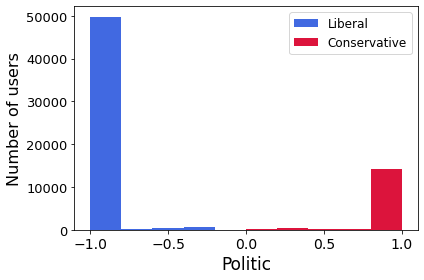

In [103]:
#All Tweets
df = df_tweetskb.drop_duplicates(subset=['Username'])
plot_histogram_kb(df['politic'],'hist_tweetsKB_political_polarized_users(alltweets)')

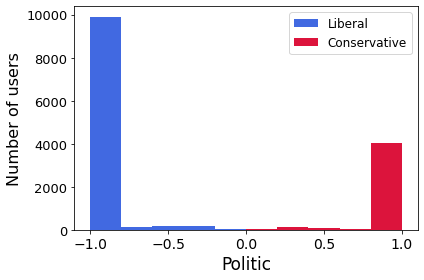

In [104]:
df = df_tweetskb_del.drop_duplicates(subset=['Username'])
plot_histogram_kb(df['politic'],'hist_tweetsKB_political_polarized_users(deletedtweets)')

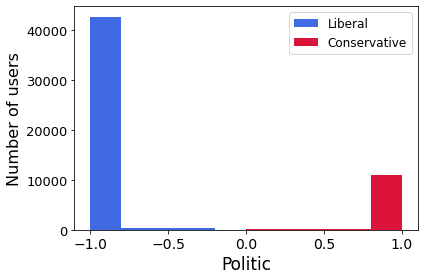

In [105]:
df = df_tweetskb_undel.drop_duplicates(subset=['Username'])
plot_histogram_kb(df['politic'],'hist_tweetsKB_political_polarized_users(nondeletedtweets)')

***

# Hexabin
### Reputation-Polarisierung

***

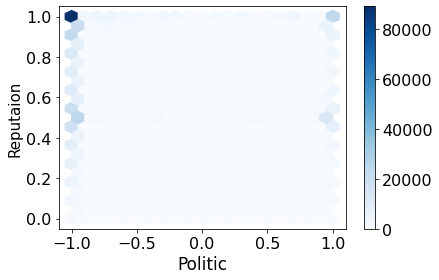

In [108]:
df = df_tweetskb[['is_deleted', 'politic', 'Reputation']]

df_del =  df[df['is_deleted']==True]
df_undel = df[df['is_deleted']==False]

plot_hexbin_reputaion(df, 'is_deleted', 'politic', 'Politic', 'Blues', 'Hexabinplot_tweetskb_political_reputation(alltweets)')

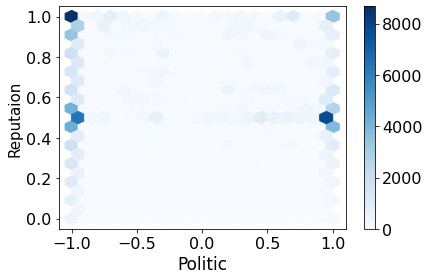

In [109]:
plot_hexbin_reputaion(df_del, 'is_deleted', 'politic', 'Politic', 'Blues','Hexabinplot_tweetskb_political_reputation(deletedtweets)')

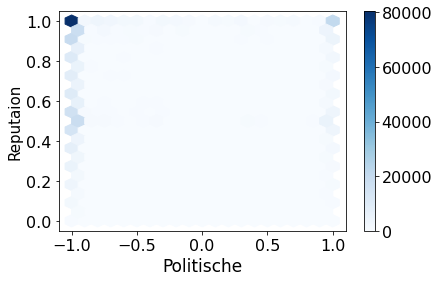

In [110]:
plot_hexbin_reputaion(df_undel, 'is_deleted', 'politic', 'Politische', 'Blues', 'Hexabinplot_tweetskb_political_reputation(nondeletedtweets)')